Bagımlı iki grup ortalaması arasında karşılaştırma yapılmak istenildiginde kullanılır 

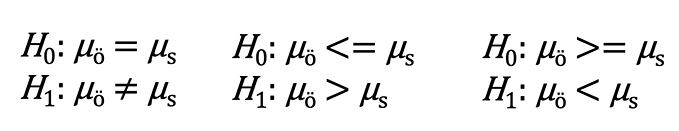

test istatistigi

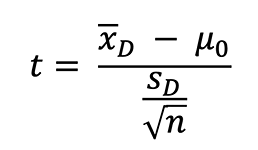

In [2]:
#normallik varsayımı
#varyans Homojenligi

## İş Uygulaması 

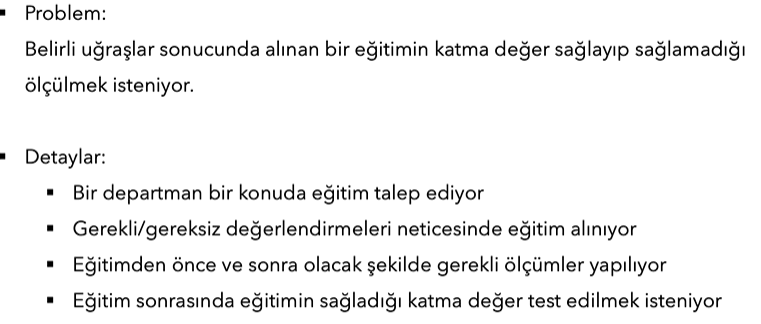

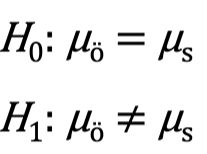

1.si egitim etkili olmuştur 

2.si egitim etkili olmamıştır 

In [4]:
import numpy as np
import pandas as pd

In [5]:
oncesi = pd.DataFrame([123,119,119,116,123,123,121,120,117,118,121,121,123,119,
            121,118,124,121,125,115,115,119,118,121,117,117,120,120,
            121,117,118,117,123,118,124,121,115,118,125,115])

sonrasi = pd.DataFrame([118,127,122,132,129,123,129,132,128,130,128,138,140,130,
             134,134,124,140,134,129,129,138,134,124,122,126,133,127,
             130,130,130,132,117,130,125,129,133,120,127,123])
#bu veri seti excelde veya başka bir şekilde karşımıza geldi bizde ona göre karşılık sisteme dönüştürme işlemi yapmış olduk 

burada altta verilen kod kısmı veriyi okumada işimizi kolaylaştırsın diye yazdıgımız bir kod blogu

In [6]:
#BIRINCI VERI SETI
AYRIK = pd.concat([oncesi, sonrasi], axis = 1)
AYRIK.columns = ["ONCESI","SONRASI"]
print("'AYRIK' Veri Seti: \n\n ", AYRIK.head(), "\n\n")


#IKINCI VERI SETI
#ONCESI FLAG/TAG'INI OLUSTURMA
GRUP_ONCESI = np.arange(len(oncesi))
GRUP_ONCESI = pd.DataFrame(GRUP_ONCESI)
GRUP_ONCESI[:] = "ONCESI"
#FLAG VE ONCESI DEGERLERINI BIR ARAYA GETIRME
A = pd.concat([oncesi, GRUP_ONCESI], axis = 1)
#SONRASI FLAG/TAG'INI OLUSTURMA
GRUP_SONRASI = np.arange(len(sonrasi))
GRUP_SONRASI = pd.DataFrame(GRUP_SONRASI)
GRUP_SONRASI[:] = "SONRASI"

#FLAG VE SONRASI DEGERLERINI BIR ARAYA GETIRME
B = pd.concat([sonrasi, GRUP_SONRASI], axis = 1)

#TUM VERIYI BIR ARAYA GETIRME
BIRLIKTE = pd.concat([A,B])
BIRLIKTE

#ISIMLENDIRME
BIRLIKTE.columns = ["PERFORMANS","ONCESI_SONRASI"]
print("'BIRLIKTE' Veri Seti: \n\n", BIRLIKTE.head(), "\n")

'AYRIK' Veri Seti: 

     ONCESI  SONRASI
0     123      118
1     119      127
2     119      122
3     116      132
4     123      129 


'BIRLIKTE' Veri Seti: 

    PERFORMANS ONCESI_SONRASI
0         123         ONCESI
1         119         ONCESI
2         119         ONCESI
3         116         ONCESI
4         123         ONCESI 



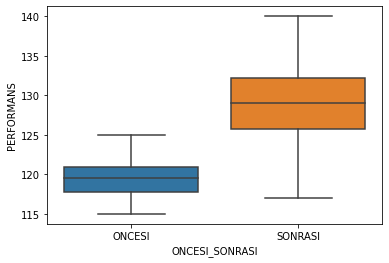

In [7]:
import seaborn as sns
sns.boxplot(x="ONCESI_SONRASI",y="PERFORMANS",data=BIRLIKTE);

buna bakıtıgımızda egitim işe yaramış deriz ama kesin olarak bu olmuştur diyemeyiz testlerimizi devam ettirmeliyiz

In [8]:
#aşagıdakiler veri seti oluşturulurken yazılan veri miktarı

In [9]:
np.arange(len(oncesi))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39])

In [10]:
np.arange(len(sonrasi))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39])

In [11]:
oncesi[0:5]

,0
0,123
1,119
2,119
3,116
4,123


In [12]:
sonrasi[0:5]

,0
0,118
1,127
2,122
3,132
4,129


## Bagımlı İki Örnklem T Testi varsayım Kontrolü

Varsayım Kontrolleri

In [13]:
from scipy.stats import shapiro

In [14]:
shapiro(AYRIK.ONCESI)

ShapiroResult(statistic=0.9543656706809998, pvalue=0.10722451657056808)

In [15]:
shapiro(AYRIK.SONRASI)

ShapiroResult(statistic=0.9780089259147644, pvalue=0.6159515380859375)

In [16]:
import scipy.stats as stats
stats.levene(AYRIK.ONCESI,AYRIK.SONRASI)

LeveneResult(statistic=8.31303288672351, pvalue=0.0050844511807370246)

p value degerine göre hipotezler saglanmamış görünür

## Bagımlı İki Örneklem T testi Uygulaması 

In [17]:
stats.ttest_rel(AYRIK.ONCESI,AYRIK.SONRASI)

Ttest_relResult(statistic=-9.281533480429937, pvalue=2.0235251764440722e-11)

In [19]:
# Burada belirliyici ifade => %
#%.4f=>virgulden sonra gösterilecek deger sayısı 
test_istatistigi,pvalue=stats.ttest_rel(AYRIK["ONCESI"],AYRIK["SONRASI"])
print('Test İstatistigi=%.4f, p-degeri=%.4f'%(test_istatistigi,pvalue))

Test İstatistigi=-9.2815, p-degeri=0.0000


## Nonparametrik Bagımlı İki Örneklem Testi

In [21]:
stats.wilcoxon(AYRIK.ONCESI,AYRIK.SONRASI)

WilcoxonResult(statistic=15.0, pvalue=2.491492033374464e-07)

In [25]:
test_istatistigi,pvalue=stats.wilcoxon(AYRIK["ONCESI"],AYRIK["SONRASI"])

print('Test İstatisigi= %.4f, p-degeri=%.4f'%(test_istatistigi,pvalue))

Test İstatisigi= 15.0000, p-degeri=0.0000


## İki Örneklem Oran Testi

iki oran arasında karşılaştırma yapmak için kullanılır 

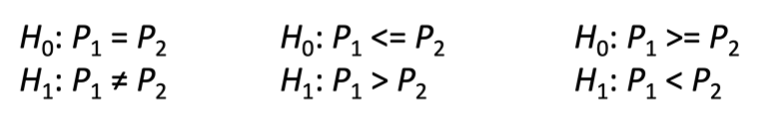

test istatistigi

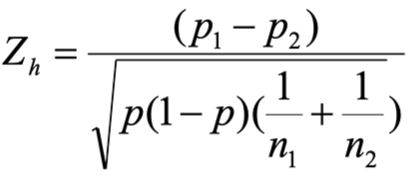

n1>30
n2>30

## İŞ Uygulaması (Kullanıcı arayüz deneyi-buton renk seçimi oranını bulma)

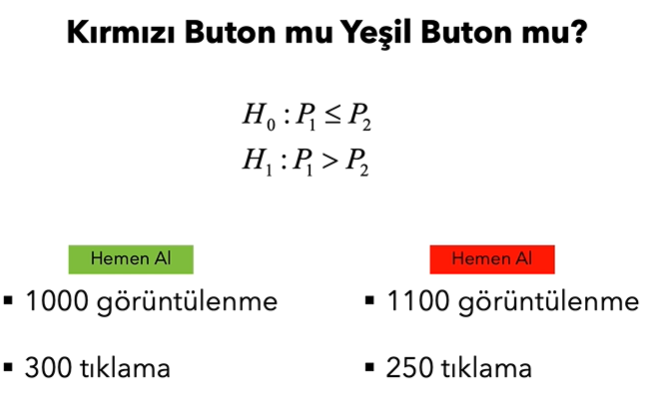

In [27]:
from statsmodels.stats.proportion import proportions_ztest

In [28]:
import numpy as np
basari_sayisi=np.array([300,250])
gozlem_sayilari=np.array([1000,1100])

In [29]:
proportions_ztest(count=basari_sayisi,nobs=gozlem_sayilari)

(3.7857863233209255, 0.0001532232957772221)

bu durumda H0 hipotezi reddedilir ,yani hazırlanan buton renkleri kullanıcılarda faklılık uyandırıyor ve yeşil butonun lehine olacak şekildedir,aynı zamanda bu iki oranda istatistiki olarak bir farklılık vardır demektir 

## Varyans Analizi

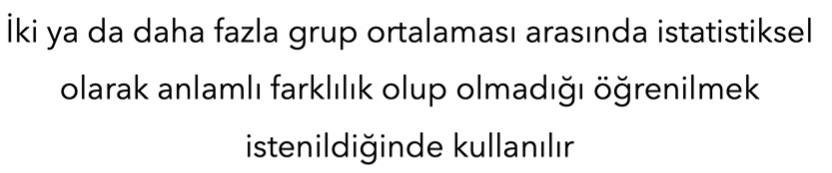

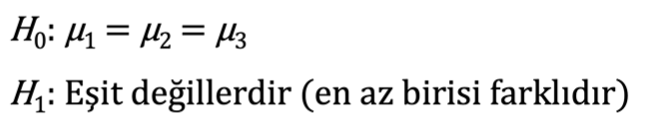

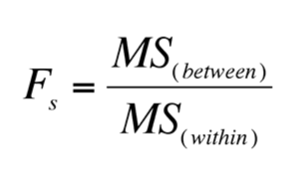

VARSAYIMLARIMIZ

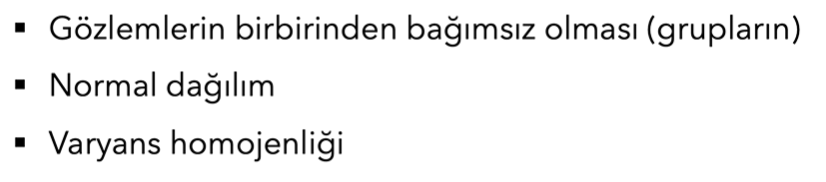

## İŞ UYGULAMASI :anasayfa içerik stratejisi belirlemek(insanların sitede geçirdigi süreyi arttırmak)

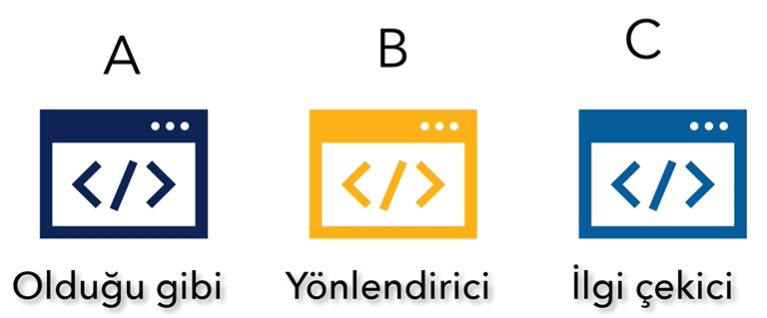

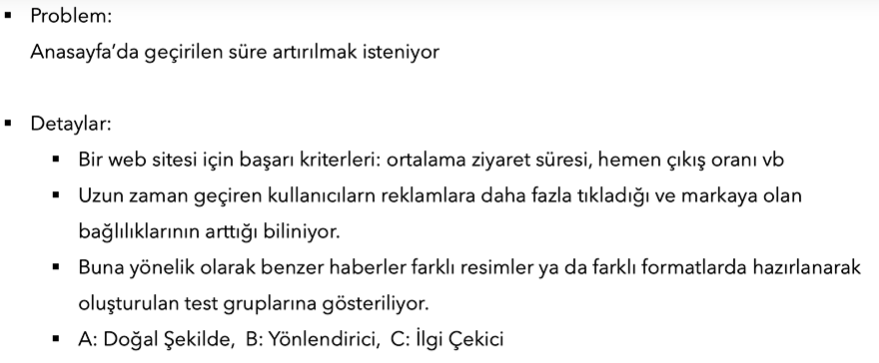

H0: M1 = M2 = M3 (grup ortalamalari arasinda ist anl. farklilik yoktur) 

H1: Fark vardir.

In [33]:
#veri setimiz(csv-excel formatında gelecek)
#a b c haber tarzlarımız 
A = pd.DataFrame([28,33,30,29,28,29,27,31,30,32,28,33,25,29,27,31,31,30,31,34,30,32,31,34,28,32,31,28,33,29])

B = pd.DataFrame([31,32,30,30,33,32,34,27,36,30,31,30,38,29,30,34,34,31,35,35,33,30,28,29,26,37,31,28,34,33])

C = pd.DataFrame([40,33,38,41,42,43,38,35,39,39,36,34,35,40,38,36,39,36,33,35,38,35,40,40,39,38,38,43,40,42])

dfs = [A, B, C]

ABC = pd.concat(dfs, axis = 1)
ABC.columns = ["GRUP_A","GRUP_B","GRUP_C"]
ABC.head()

,GRUP_A,GRUP_B,GRUP_C
0,28,31,40
1,33,32,33
2,30,30,38
3,29,30,41
4,28,33,42


### Varsayım Kontrolü

In [35]:
from scipy.stats import shapiro

In [37]:
shapiro(ABC["GRUP_A"])

ShapiroResult(statistic=0.969743549823761, pvalue=0.5321813225746155)

In [40]:
shapiro(ABC["GRUP_B"])

ShapiroResult(statistic=0.9789854884147644, pvalue=0.7979801297187805)

In [41]:
shapiro(ABC["GRUP_C"])

ShapiroResult(statistic=0.9579201340675354, pvalue=0.273820161819458)

In [42]:
#3 grup için h0 saglanıyor

In [43]:
stats.levene(ABC["GRUP_A"],ABC["GRUP_B"],ABC["GRUP_C"])

LeveneResult(statistic=1.0267403645055275, pvalue=0.36247110117417064)

burada varyanslar homojendir deriz, h0 saglanıyor 

### Hipotez Testi

In [45]:
from scipy.stats import f_oneway

In [47]:
f_oneway(ABC["GRUP_A"],ABC["GRUP_B"],ABC["GRUP_C"])

F_onewayResult(statistic=74.69278140730431, pvalue=1.3079050746811477e-19)

In [48]:
#görünütü iyi degil bu şekilde aşagıdaki kod ile p value degerini içinden alacaz 

In [51]:
print('{:.5f}'.format (f_oneway(ABC["GRUP_A"],ABC["GRUP_B"],ABC["GRUP_C"])[1]))

0.00000


h0 istatitik olarak bir fark yokturdu ama buradaki degere göre biz haber gruplarında anlamlı bir faklılık oldugunu görürüz yani h0 redderiz.

In [54]:
ABC.describe().T
#yani ilgi çekiçi(tık tuzakları,ilgi uyandırıcı görsellik) habercilik bunlar arasında farklı olmuş oldu 

,count,mean,std,min,25%,50%,75%,max
GRUP_A,30.0,30.133333,2.224214,25.0,28.25,30.0,31.75,34.0
GRUP_B,30.0,31.700000,2.937862,26.0,30.00,31.0,34.00,38.0
GRUP_C,30.0,38.100000,2.808239,33.0,36.00,38.0,40.00,43.0


### Nonparametrik Hipotez Testi

In [56]:
from scipy.stats import kruskal #yukarıdaki varsayımlar çalışmazsa bunu kullanırız

In [57]:
kruskal(ABC["GRUP_A"],ABC["GRUP_B"],ABC["GRUP_C"])

KruskalResult(statistic=54.19819735523783, pvalue=1.7022015426175926e-12)

h0 reddedilebir,anlamlı farklılık vardır 